# Домашнее задание №2

<span style="color: red; font-size: 14pt">Дедлайн: 13 марта 23:59</span>

Машинное обучение, ФИВТ, Весна 2018

Составлено с использованием материалов Евгения Колмакова и Юрия Кашницкого (открытый курс машинного обучения, тема 3), а также лекций по машинному обучению Евгения Соколова

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall <номер_группы> <фамилия>``, к примеру -- ``ML2018_fall 596 ivanov``
- Выполненное дз сохраните в файл ``ML2018_<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2018_ivanov_596_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, мы не найдем ваше дз, если вы укажете тему письма в неправильном формате.
- **PS2**: Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре

## Часть 0. Вопросы для самоконтроля

##### Перед выполнением задания убедитесь, что вы знаете ответы на этот теор.минимум
##### Эта часть задания не оценивается, ответы можно не записывать

1. Что такое решающее дерево? Как по построенному дереву найти прогноз для объекта?
2. Почему для любой выборки можно построить дерево, имеющее нулевую ошибку на ней? Приведите примеры.
3. Почему не рекомендуется строить небинарные деревья (имеющие более двух потомков у каждой вершины)?
4. Как устроен жадный алгоритм построения дерева?
5. Какие критерии информативности для решения задачи классификации вы знаете?
6. Какой смысл у критерия Джини и энтропийного критерия?
7. Какие критерии информативности для решения задачи регрессии вы знаете?
8. Что такое pruning (стрижка) дерева? Чем отличаются post-pruning и pre-pruning?
9. Какие методы обработки пропущенных значений вы знаете?
10. Как учитывать категориальные признаки в решающем дереве?
11. Что такое mean target encoding? Почему эта техника хорошо работает для решающих деревьев?
12. Как работает отбор признаков с помощью решающих деревьев?

## Часть 1. Теоретические задачи

##### 30% баллов за задание, оценочное время выполнения 1 час

##### Решение можно затехать здесь или написать от руки и добавить фото в ноутбук

### Задача 1 (10% баллов)

Какая стратегия поведения в листьях регрессионного дерева приводит к меньшему матожиданию ошибки по MSE: отвечать средним значением таргета на объектах обучающей выборки, попавших в лист, или отвечать таргетом для случайного объекта из листа (считая все объекты равновероятными)?

*Решение:*

Когда выбираем среденее:
$\mathsf{E} \, MSE(y, \hat{y}) = \frac{1}{n} \, \mathsf{E} \sum_i \, (y_i - \overline{y})^2 = \frac{1}{n} \mathsf{E} \sum_i y_i^2 - 2\,\overline{y}\frac{1}{n}\mathsf{E}\sum_i y_i + \overline{y}^2 = (\frac{1}{n} \sum_i y_i^2 - 2\overline{y}^2) +  \overline{y}^2 = (\frac{1}{n} \sum_i y_i^2 - 2\overline{y}^2) + (\mathsf{E}y)^2$

Когда выбираем случайное:
$\mathsf{E} \, MSE(y, k) = \frac{1}{n} \, \mathsf{E} \sum_i \, (y_i - k)^2 = \frac{1}{n} \mathsf{E} \sum_i y_i^2 - 2\,\mathsf{E}k\,\frac{1}{n}\sum_i y_i + \mathsf{E}k^2 = (\frac{1}{n} \sum_i y_i^2 - 2\overline{y}^2) + \mathsf{E}y^2$

$\mathsf{D}y = \mathsf{E}y^2 - (\mathsf{E}y)^2 \geq 0$, т.е. $\mathsf{E}y^2 \geq (\mathsf{E}y)^2$ 

Получили, что в первом случае матожидание ошибки меньше.

### Задача 2 (15% баллов)

Критерий информативности для набора объектов $L$ вычисляется на основе того, насколько хорошо их целевые переменные предсказываются константой (при оптимальном выборе этой константы):
$$H(R) = \min_{c \in Y} \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} L(y_i, c),$$
где $L(y_i, c)$- некоторая функция потерь. Соответственно, чтобы получить вид критерия при конкретной функции потерь, необходимо аналитически найти оптимальное значение константы и подставить его в формулу для $H(R)$.

Выведите критерии информативности для следующих функций потерь:
1. $L(y,c) = (y-c)^2$
2. $L(y,c) = \sum_{k=1}^K (c_k-[y=k])^2$
3. $L(y,c) = -\sum_{k=1}^K [y=k]\log c_k$

**Подсказка**:
должны получиться дисперия, критерий Джини и энтропийный критерий.

*Решение:*
1. $H_1 = \sum_i (y_i - c)^2$, $H_1' = 0$ $\Leftrightarrow$ $ \sum_i y_i - Rc = 0 $, т.е. $c_{\text{opt}} = \frac{\sum_i y_i}{R}$ 

    $H(R) = \frac{1}{R}\sum_y(y_i - \mathsf{E}y)^2 = \mathsf{D}y$

2. $H_2 = \sum_i \sum_k (c_k - [y_i - k])^2$, $H_2' = 0$ $\Leftrightarrow$ $ \sum_i c_k = \sum_i [y_i = k]$ или $c_{opt_k} = \frac{\text{количество y лежащих в классе k}}{R} = p_k$.

    $H = \frac{1}{R}\sum_i \sum_k(p_k-[y_i=k])^2 = \frac{1}{R}\sum_i \sum_k(p_k^2 - 2p_k[y_i=k]+[y_i=k]) = \sum_k p_k^2 + 1 - 2 \sum_k p_k \frac{\sum_i[y_i=k]}{R} = 1 + \sum_k p_k^2 - 2 \sum_k p_k^2 = 1 - \sum_k p_k^2$

3. 

### Задача 3 (5% баллов)

Запишите оценку сложности построения одного решающего дерева в зависимости от размера обучающей выборки $l$, числа признаков $d$, максимальной глубины дерева $D$. В качестве предикатов используются пороговые функции $[x_j>t]$. При выборе предиката в каждой вершине перебираются все признаки, а в качестве порогов рассматриваются величины $t$, равные значения этого признака на объектах, попавших в текущую вершину. Считайте сложность вычисления критерия информативноси константной.

*Решение:*

В каждой вершине сложность $d \cdot l $. Всего таких вершин будет: $D \cdot \text{'количество вершин на уровне'} = D \cdot \sum_{k=0}^D2^k = D \cdot (2^D - 1)$.

Верхняя оценка сложности: $d \cdot l \cdot D \cdot (2^D - 1) $.

## Часть 2. Визуализация решающих деревьев

##### 20% баллов за задание, оценочное время выполнения 30 минут

Для начала нужно поставить GraphViz

- На macOS:
    - sudo pip install pydotplus
    - brew install graphviz
- Linux должно работать то же самое с заменой brew на sudo apt-get
    - sudo pip install pydotplus
    - sudo apt-get install graphviz
- Windows
    - Установить GraphViz отсюда: http://www.graphviz.org/Download_windows.php
    - Добавить путь к папке bin в PATH (например, "C:\Programs\Graphviz2.38\bin")
    - pip install pydotplus

Постройте решающее дерево из sklearn на датасете Car Evaluation Dataset (https://archive.ics.uci.edu/ml/datasets/car+evaluation)

In [263]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

df = pd.read_csv("car_evaluation.csv")
df.columns = ['buying','maint','doors','persons','lug_boot','safety','classes']

def number_encode_features(init_df):
    result = init_df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

df_encoded, encoders = number_encode_features(df)
#df_encoded_small = df_encoded.sample(n = 15, random_state=15)
df_encoded_small = df_encoded

X = df_encoded_small.values[:, :-1]
Y = df_encoded_small.values[:, -1]

Визуализируйте получившееся дерево с помощью GraphViz (следующая функция может помочь):

In [267]:
import pydotplus
from IPython.display import Image
from sklearn import tree

def draw_decision_tree(clf, column_names):
    dot_data = tree.export_graphviz(clf, out_file="tree.out", feature_names=column_names, rounded=True,)
    graph = pydotplus.graphviz.graph_from_dot_file("tree.out")  
    display(Image(graph.create_png()))

Criterion: gini


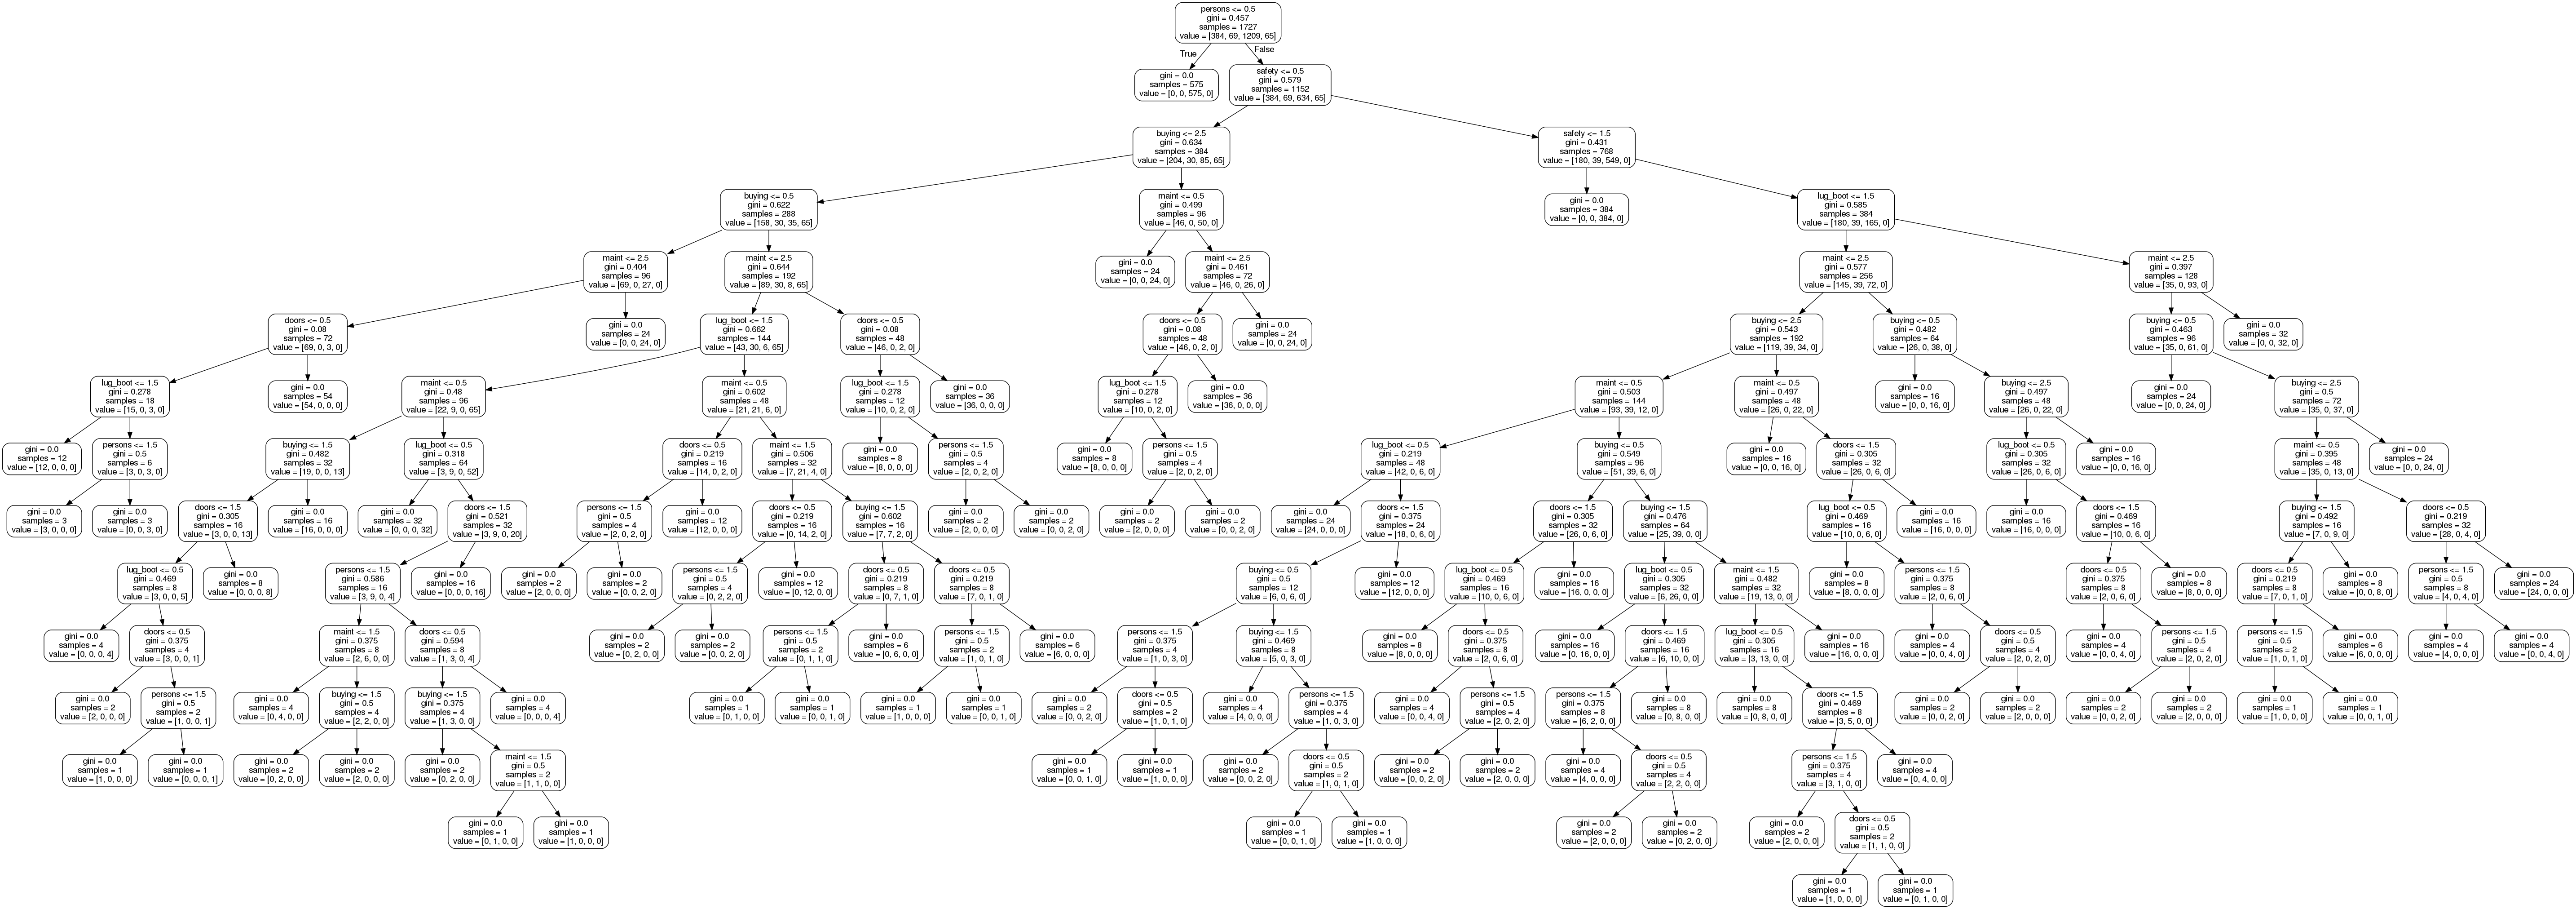

Criterion: entropy


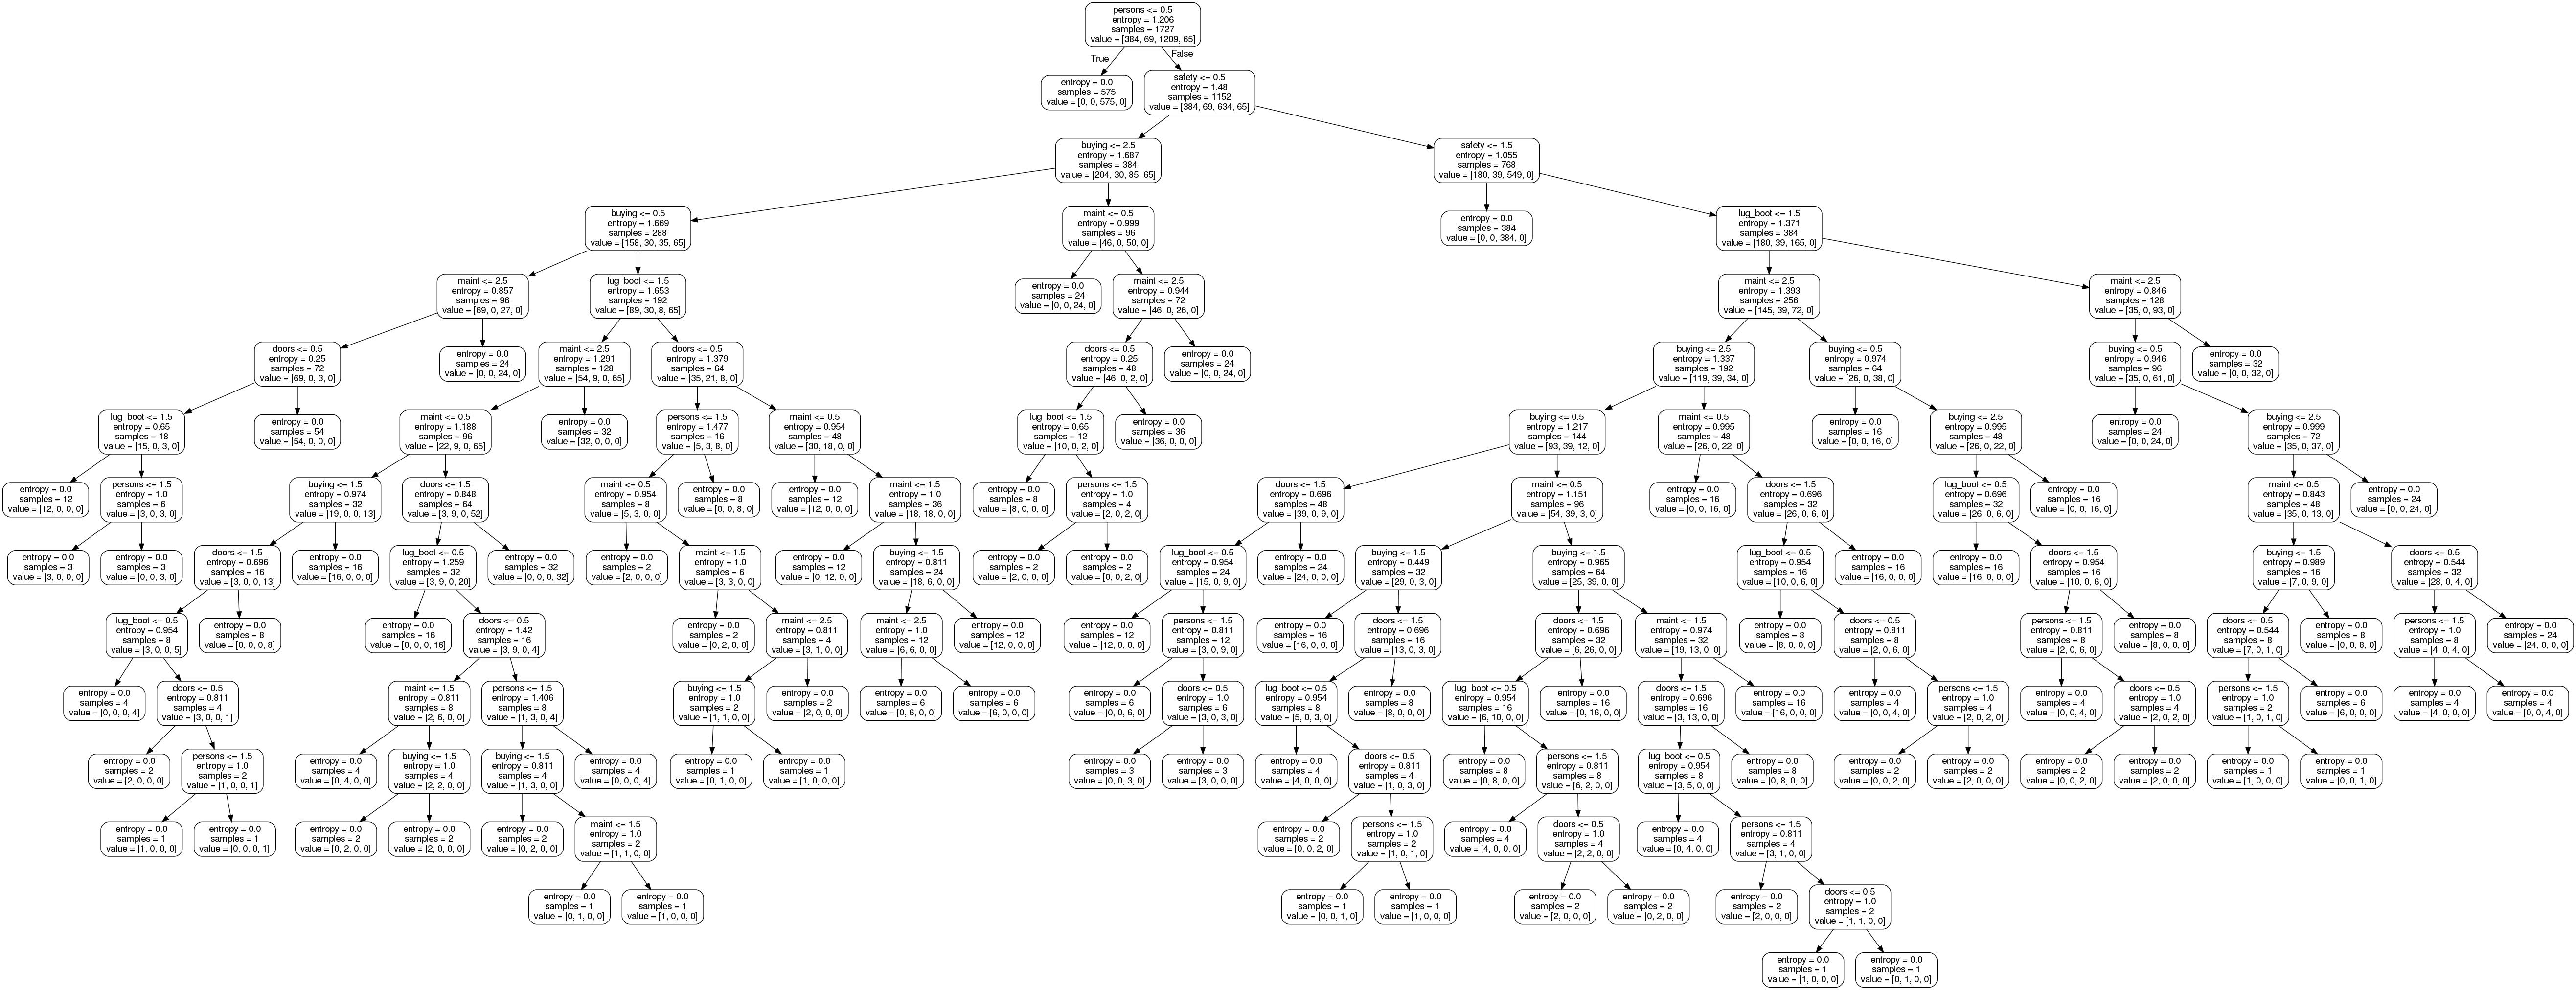

In [268]:
print("Criterion: gini")
clf = tree.DecisionTreeClassifier(criterion='gini')
clf.fit(X, Y)
draw_decision_tree(clf, df.columns[:-1])

print("Criterion: entropy")
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X, Y)
draw_decision_tree(clf, df.columns[:-1])

In [ ]:
Получили идентичные деревья для двух критериев.

Maximum depth:  5


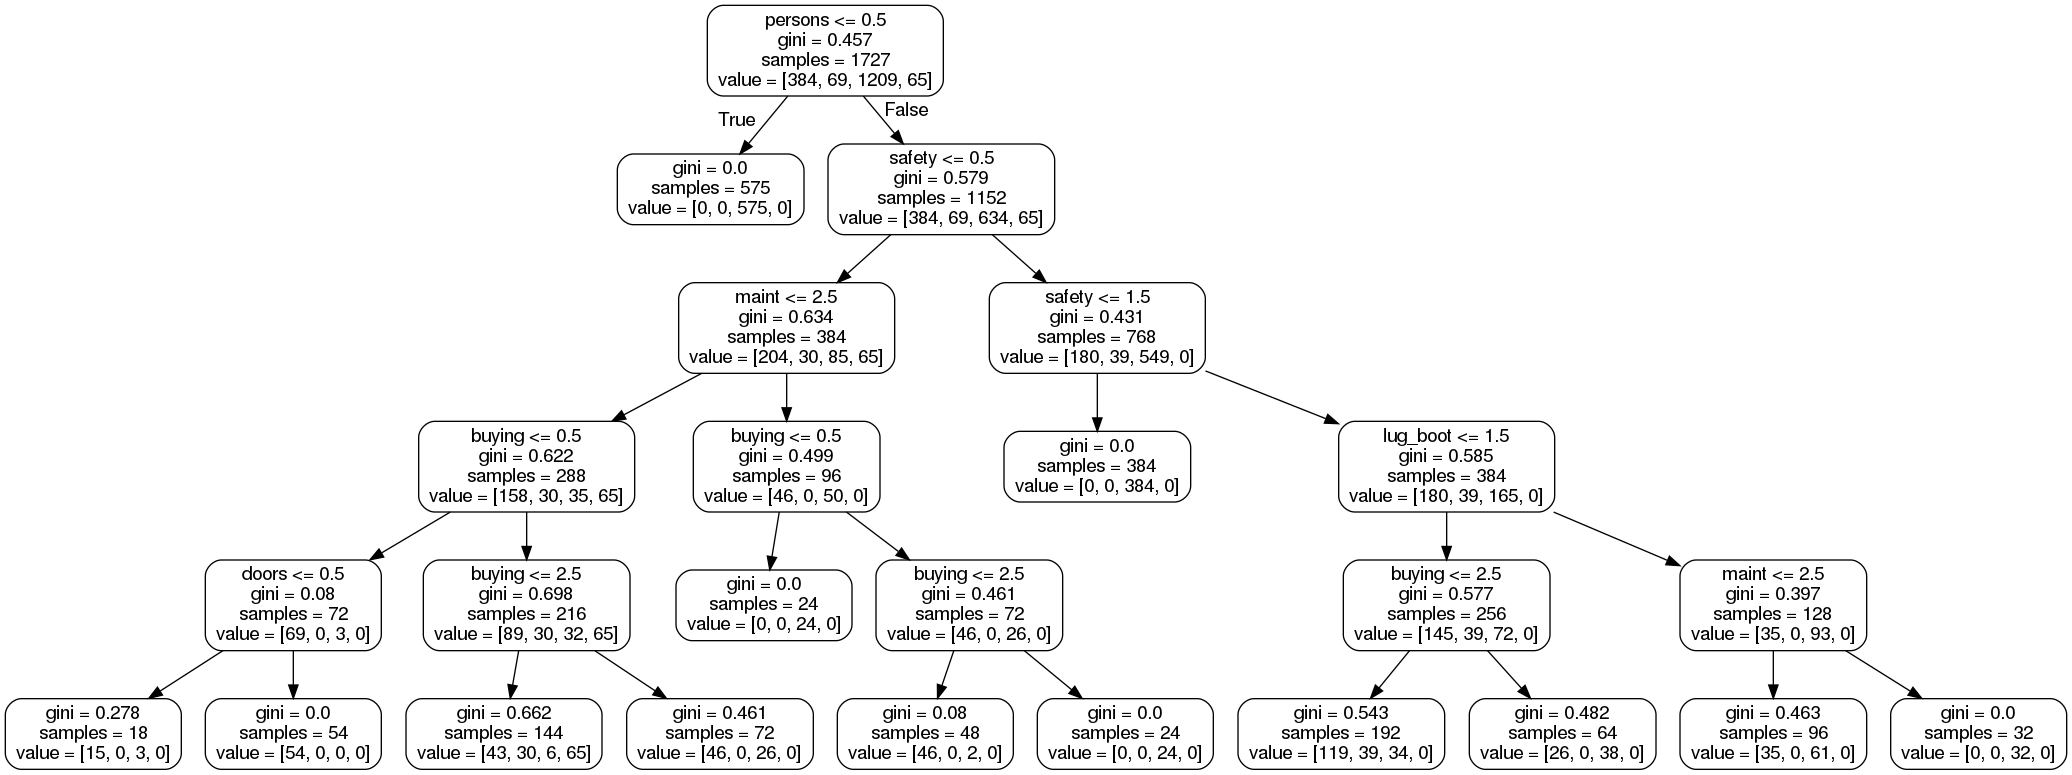

Maximum depth:  10


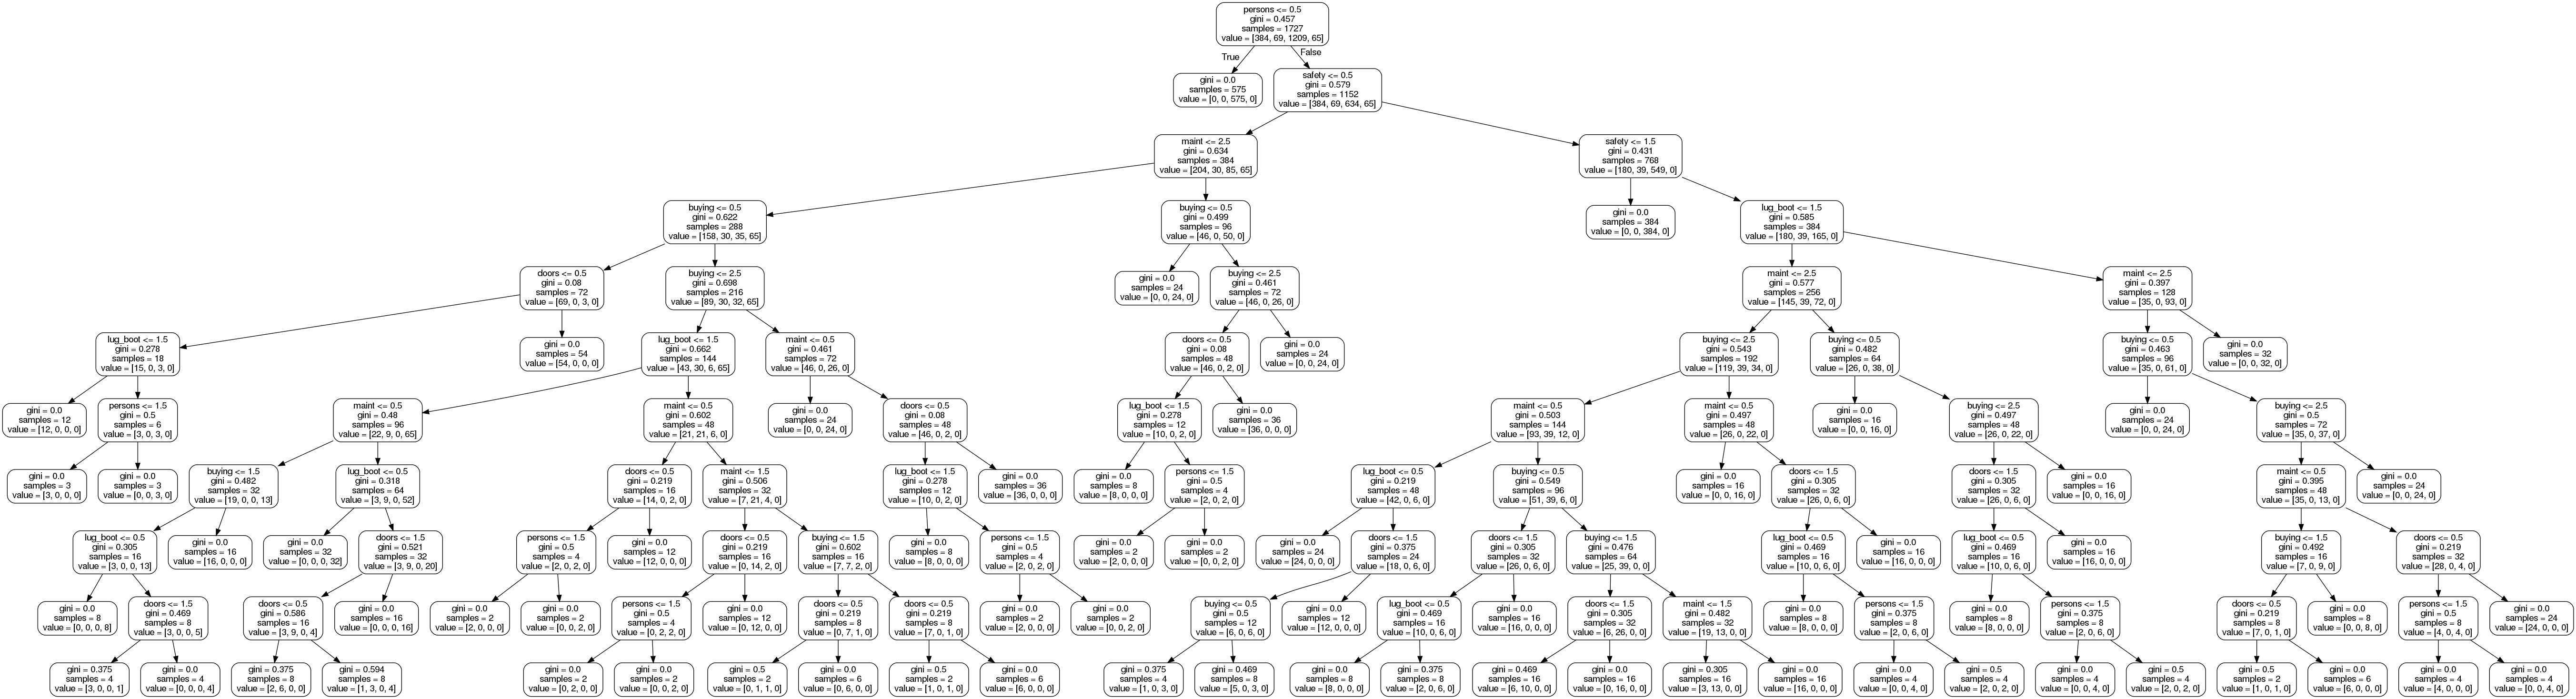

Maximum depth:  15


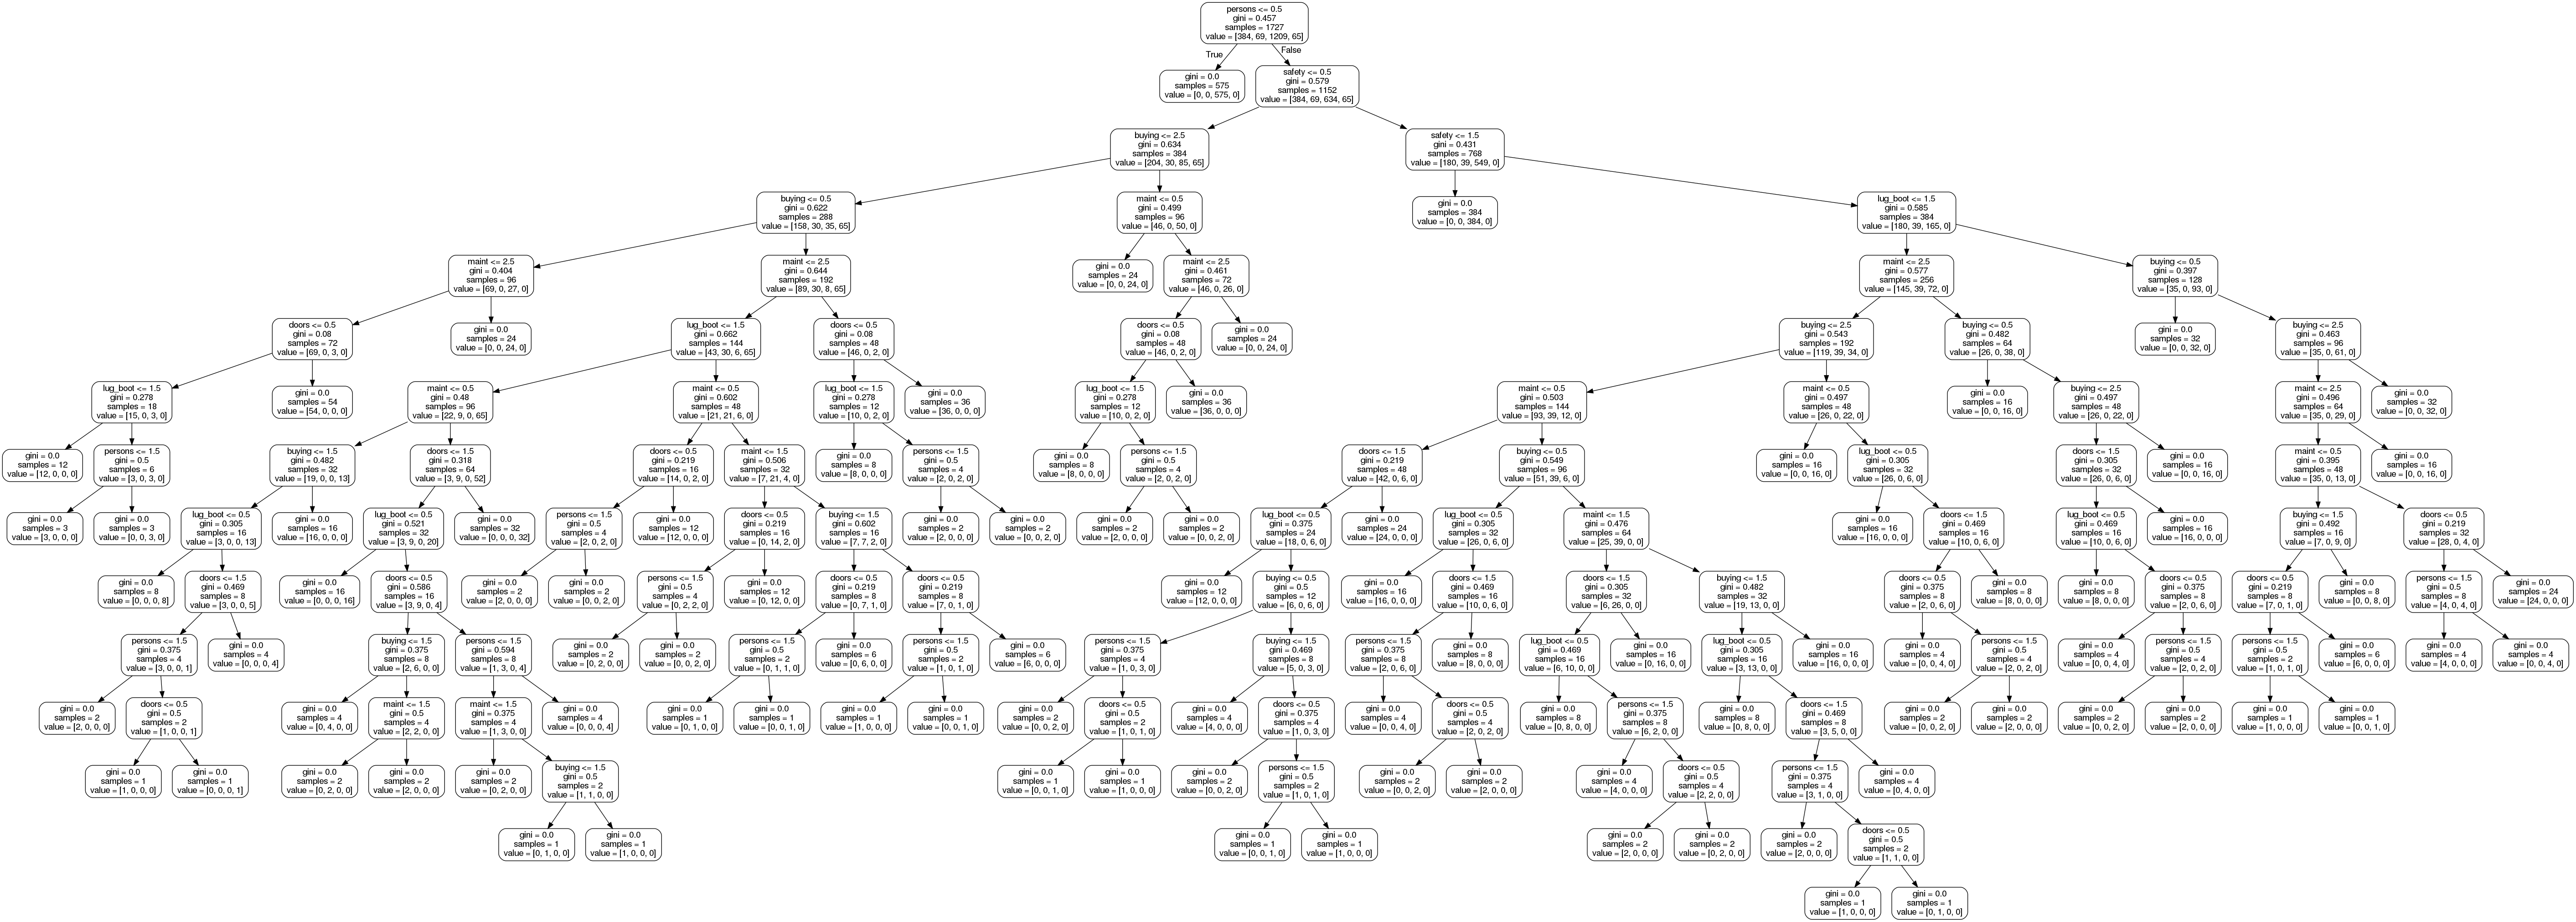

Maximum depth:  100


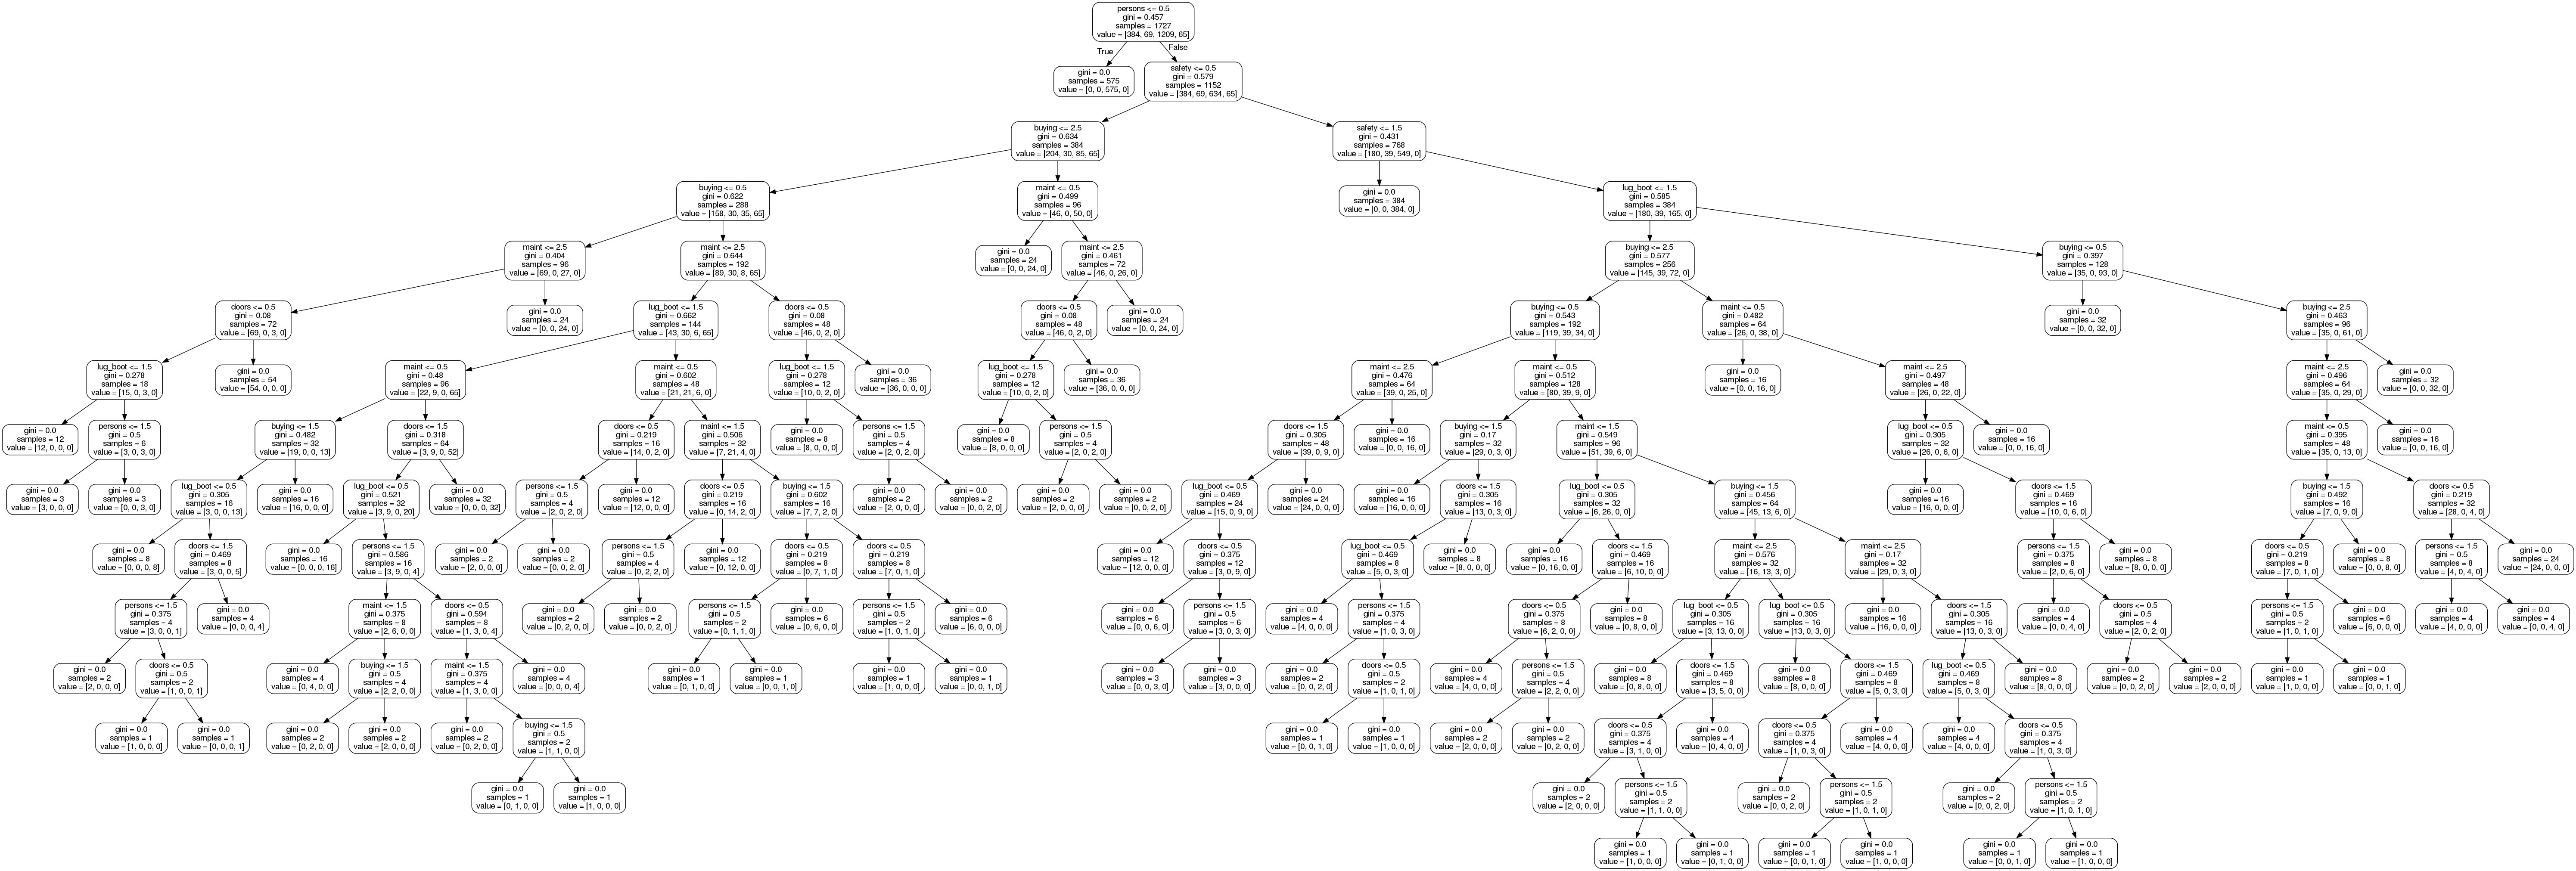

In [274]:
for depth in [5, 10, 15, 100]:
    print("Maximum depth: ", depth)
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(X, Y)
    draw_decision_tree(clf, df.columns[:-1])

Уже на глубине $15$ дерево переобучилось - так подстроилось под обучающую выборку, что в в листьях хранится только по одному объекту.

Minimum leaf samples:  100


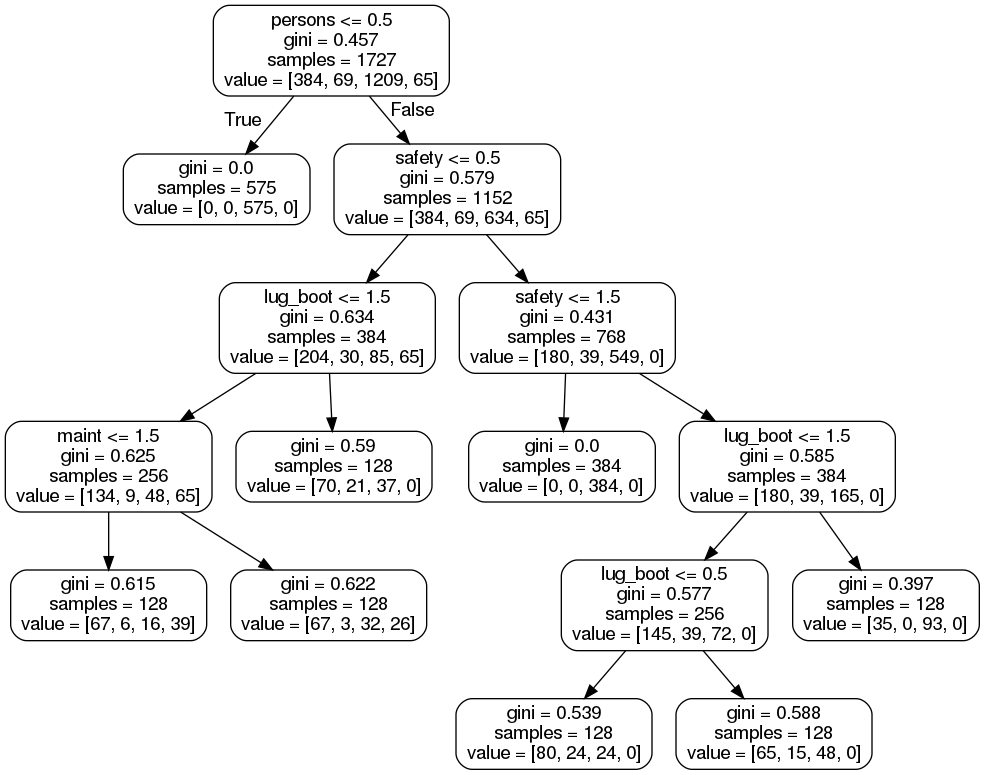

Minimum leaf samples:  10


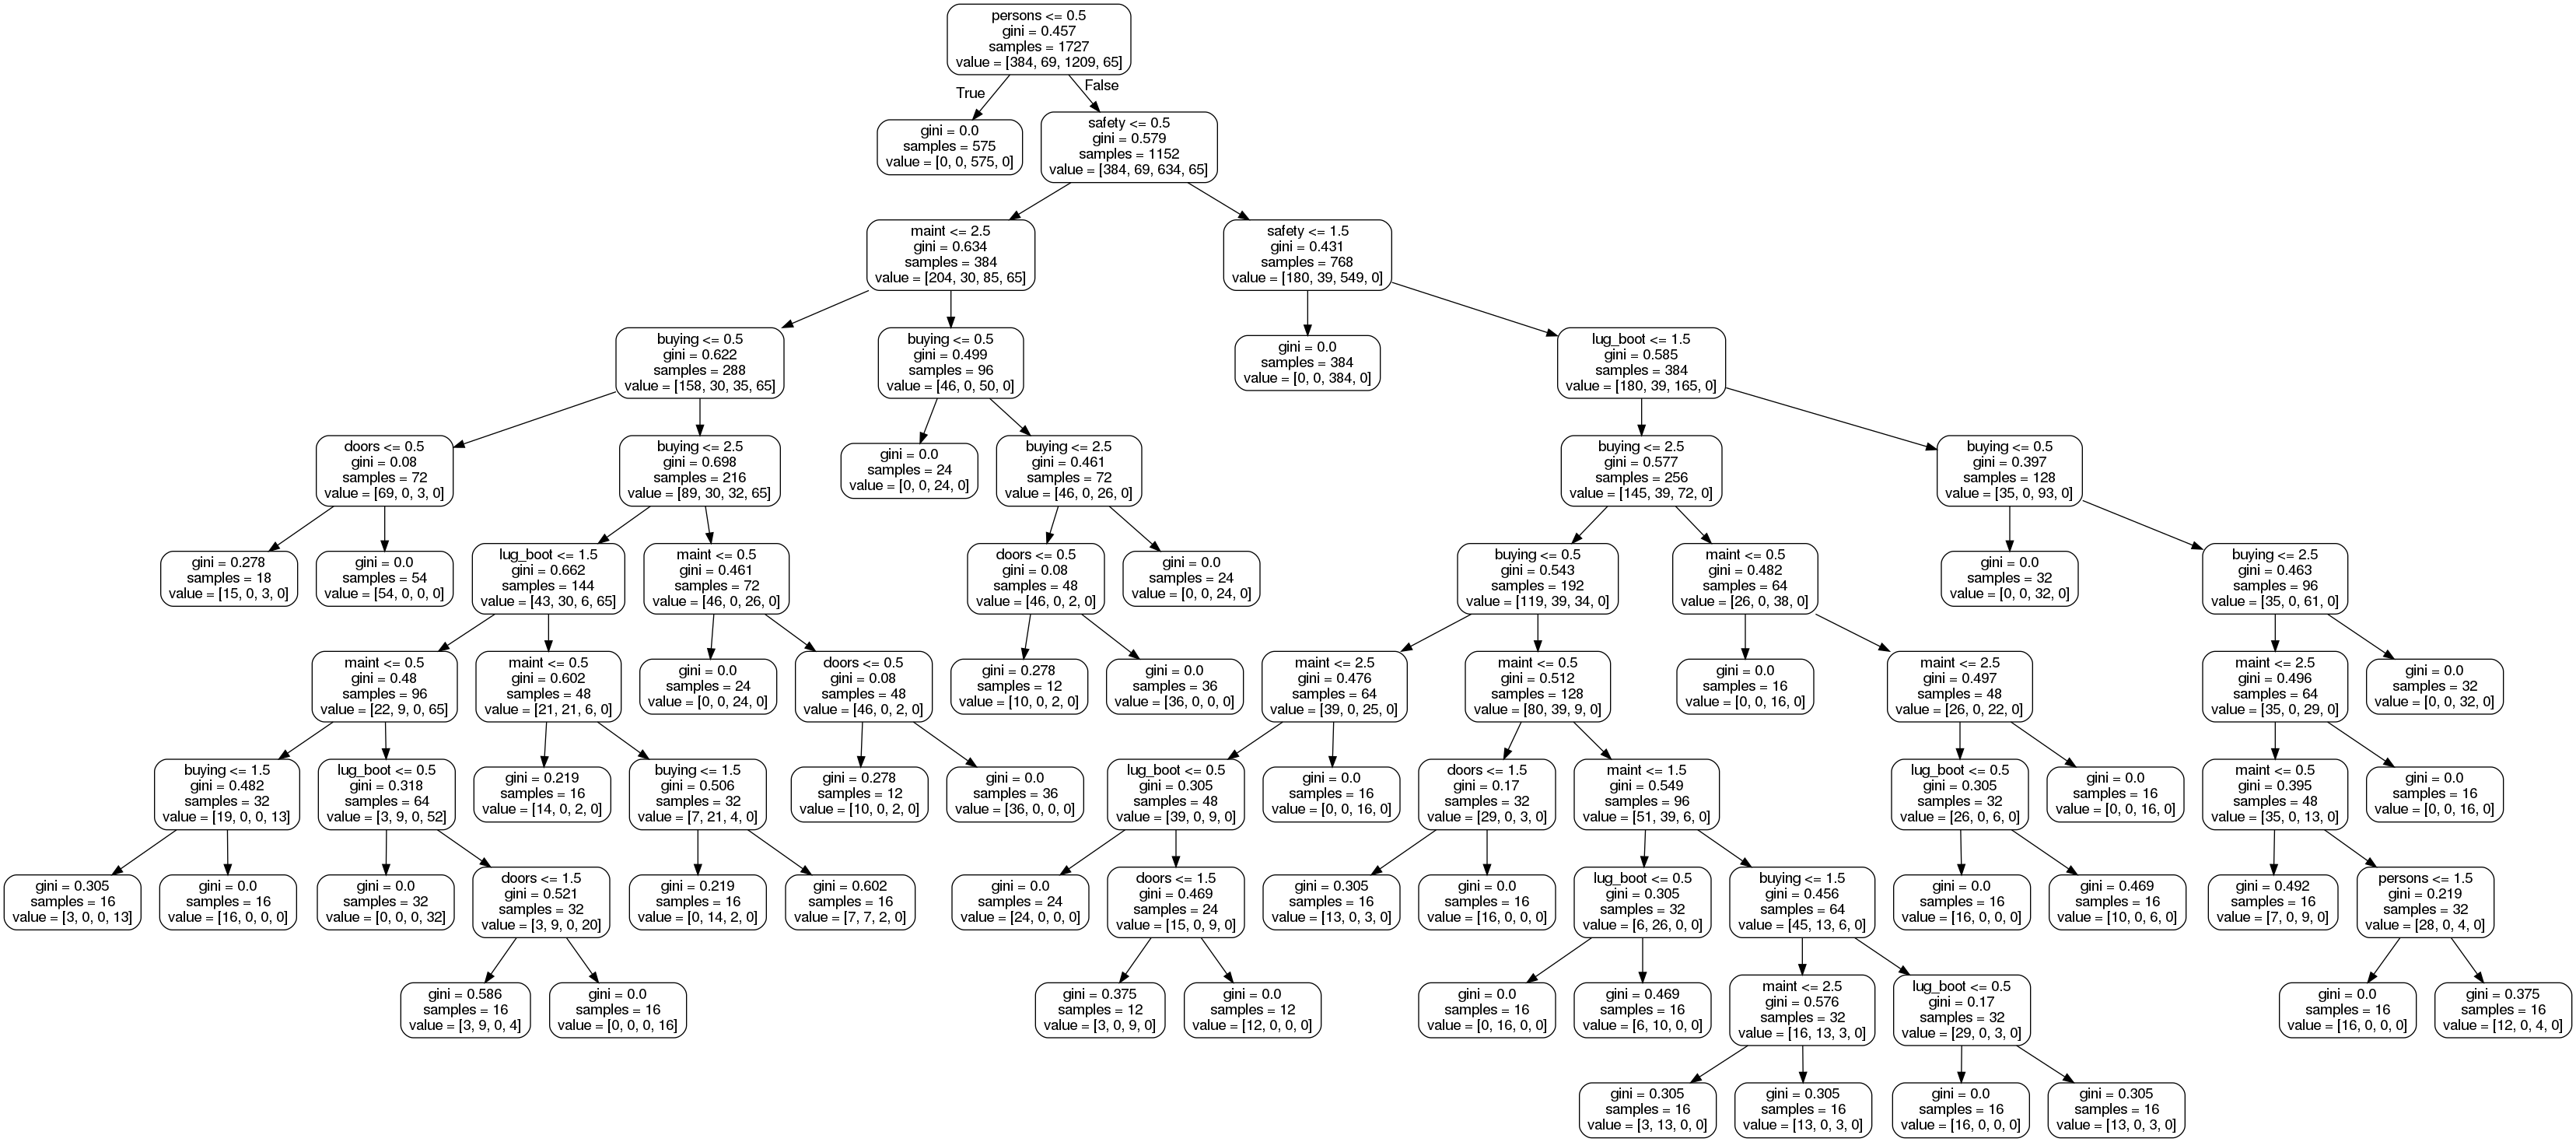

Minimum leaf samples:  5


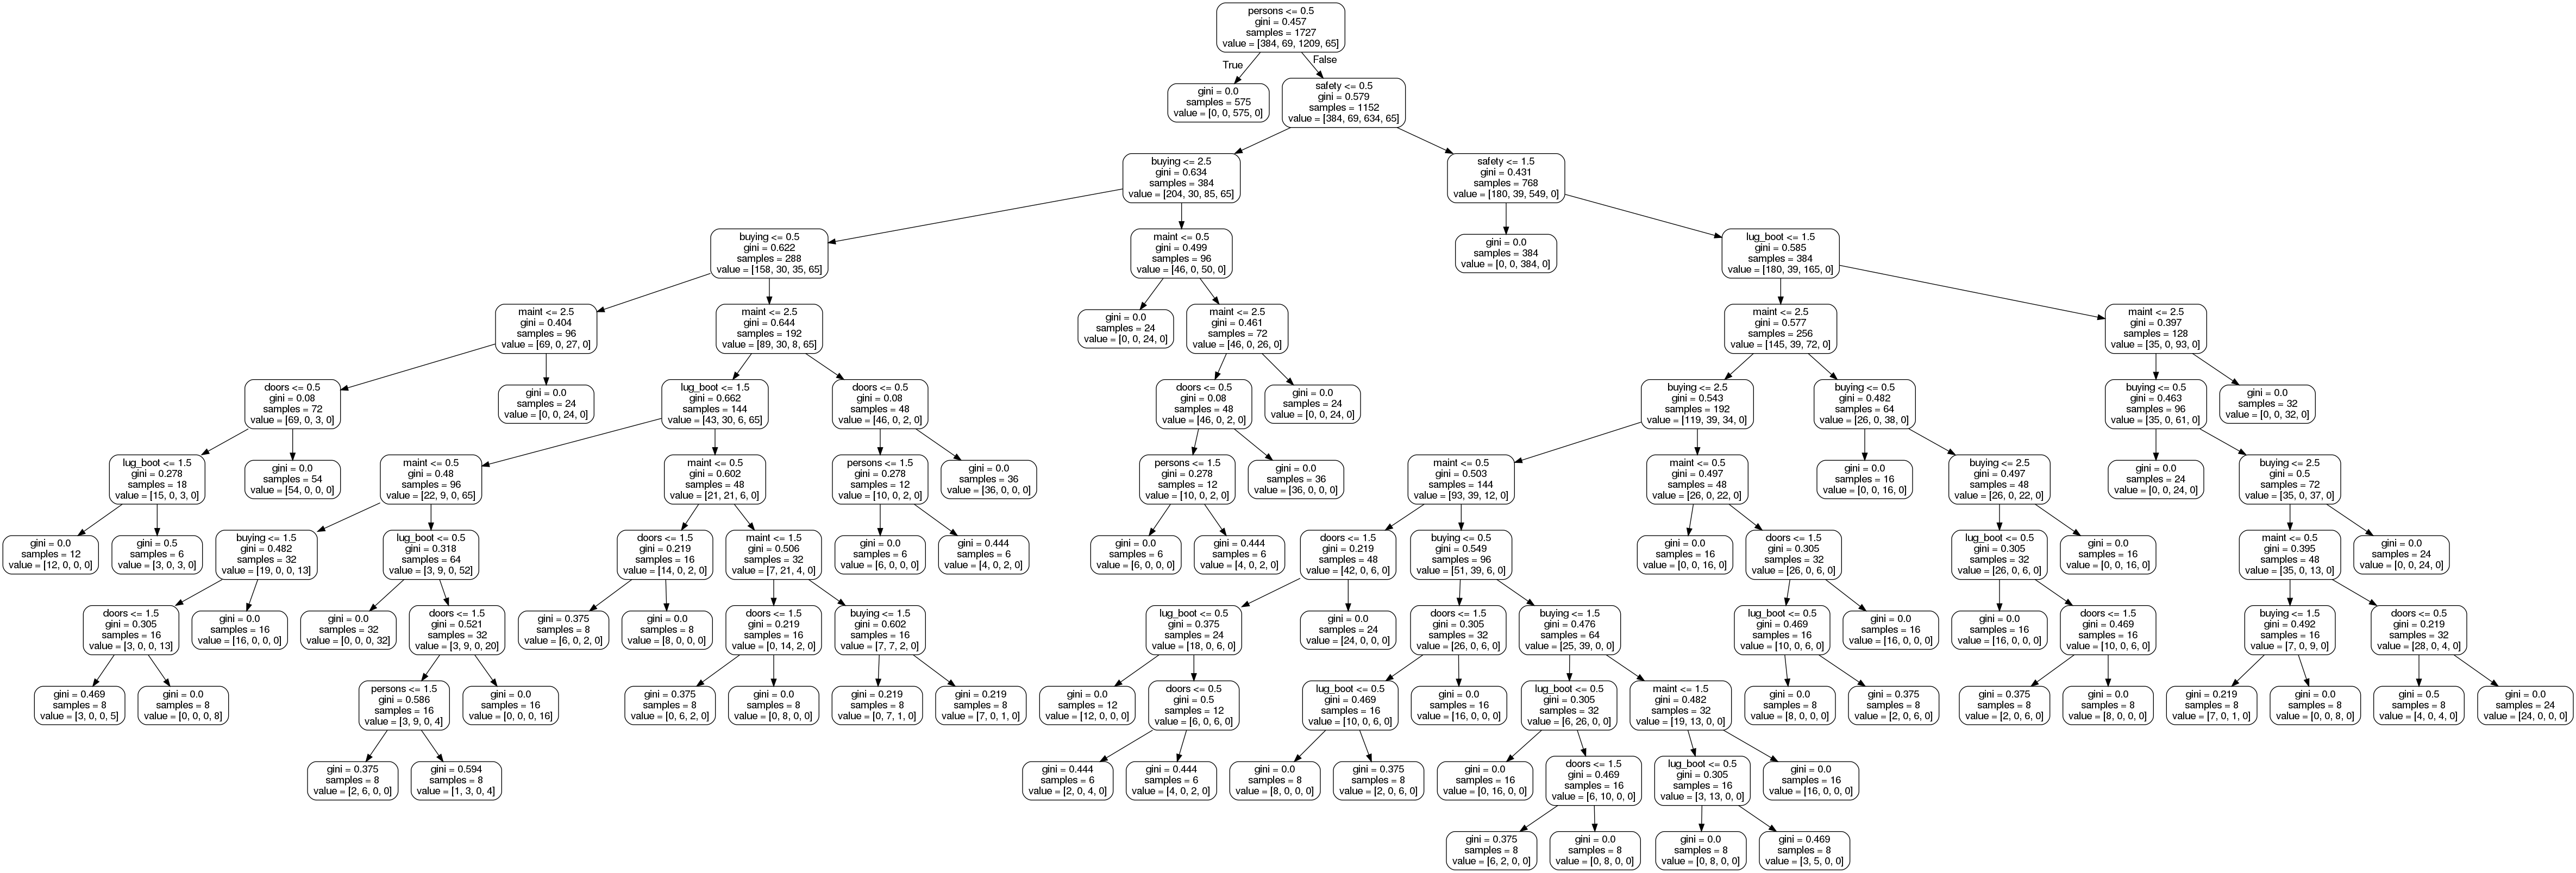

Minimum leaf samples:  2


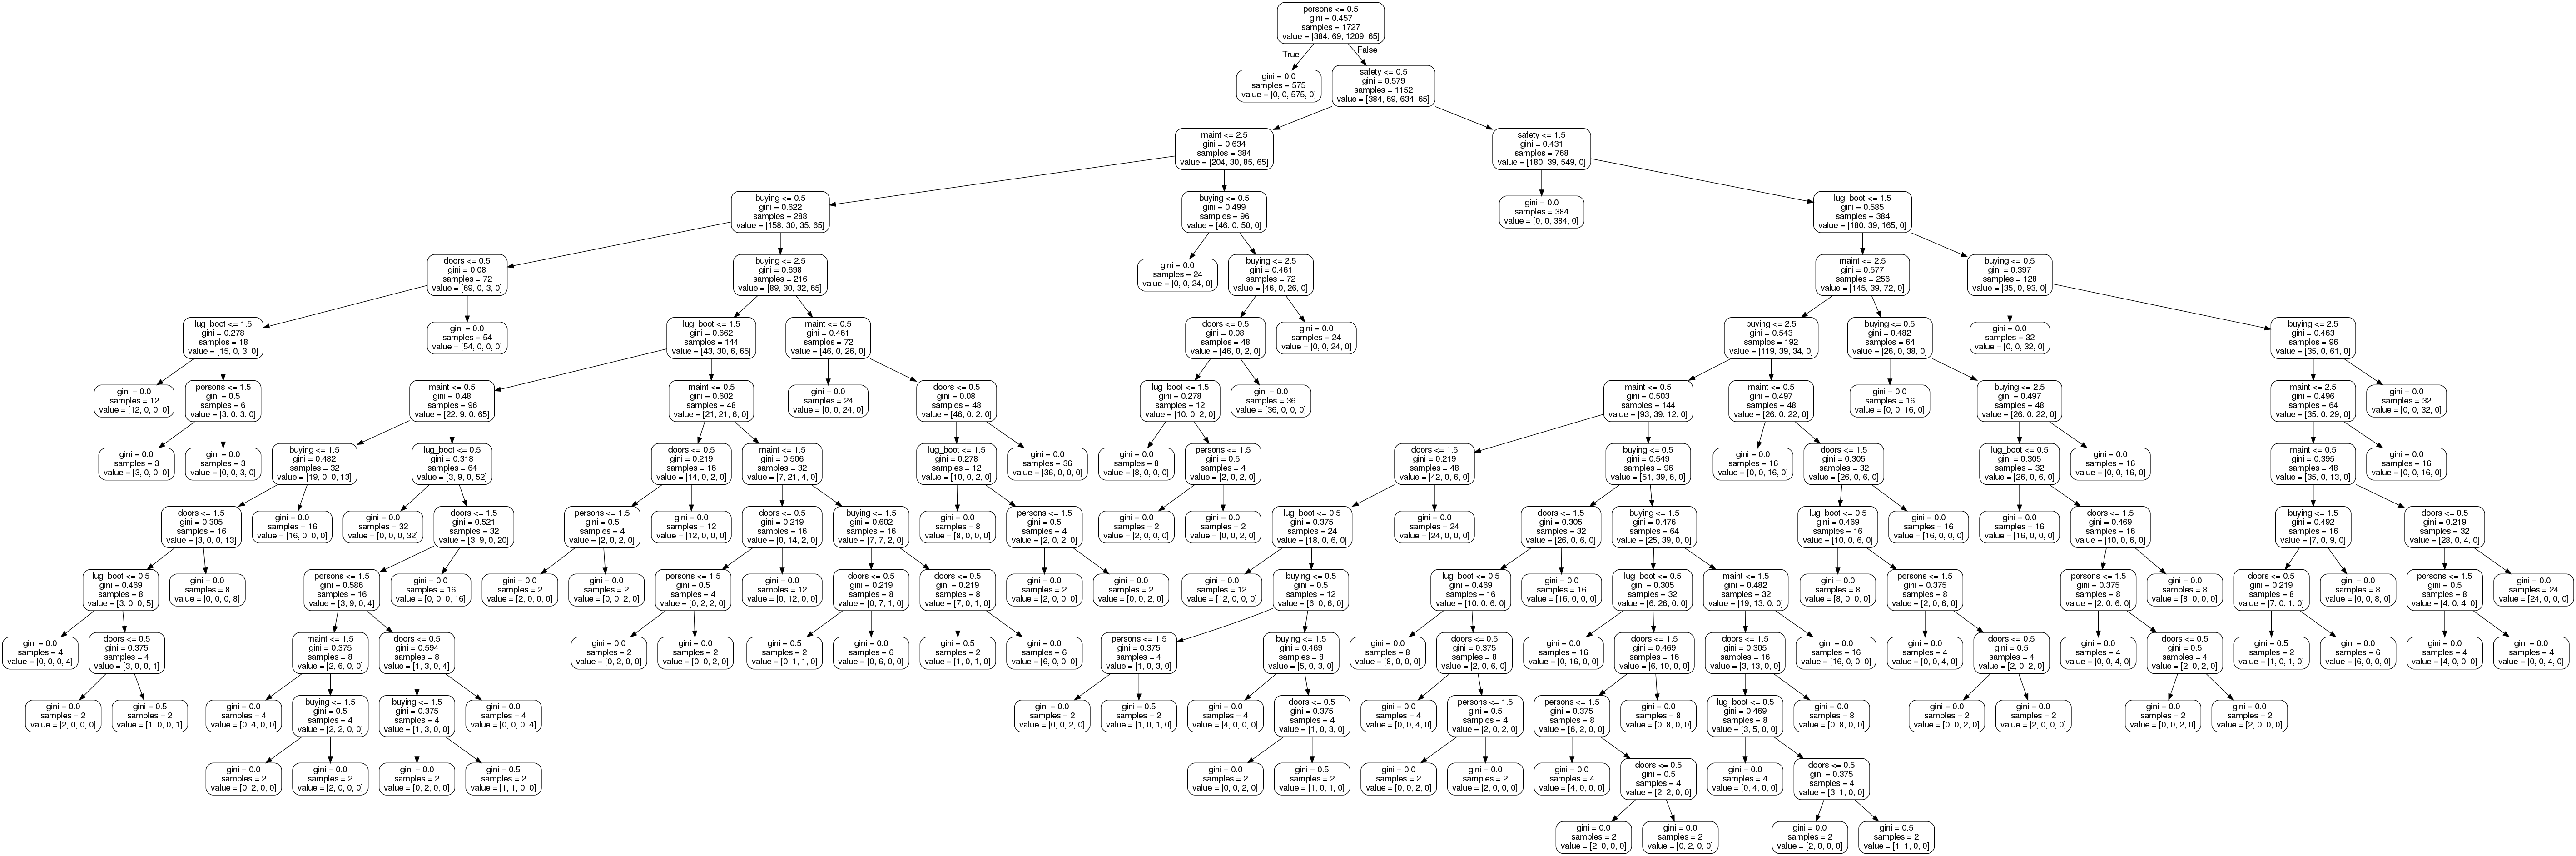

In [278]:
for leaf_samples in [100, 10, 5, 2]:
    print("Minimum leaf samples: ", leaf_samples)
    clf = tree.DecisionTreeClassifier(min_samples_leaf=leaf_samples)
    clf.fit(X, Y)
    draw_decision_tree(clf, df.columns[:-1])

Тоже видно переобучение, но это параметр заметен меньше, все, что выше $3-5$ выглядит нормально.

Maximum features:  2


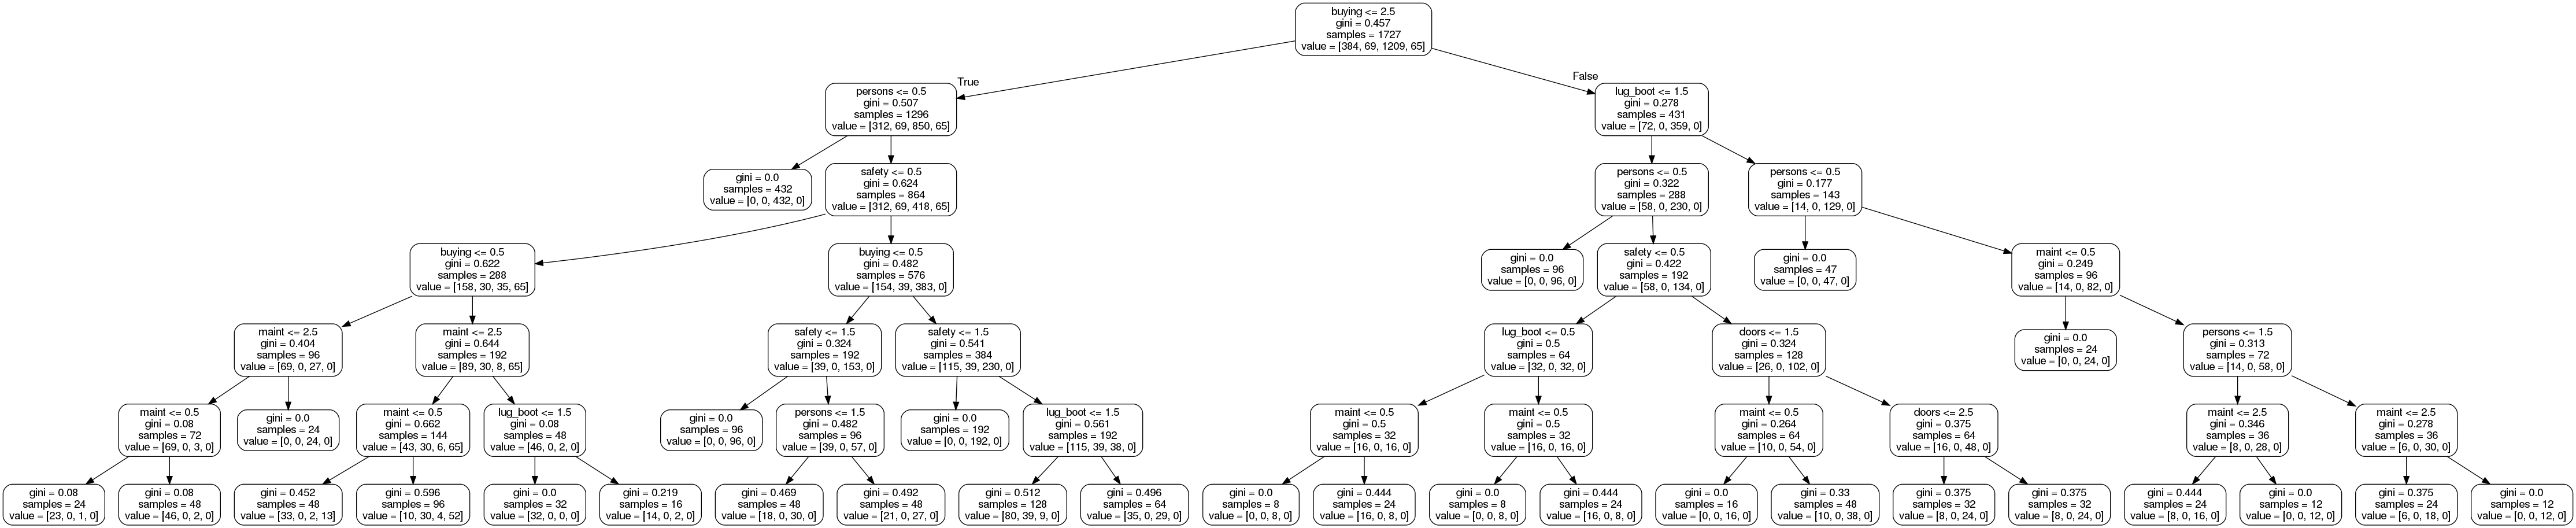

Maximum features:  4


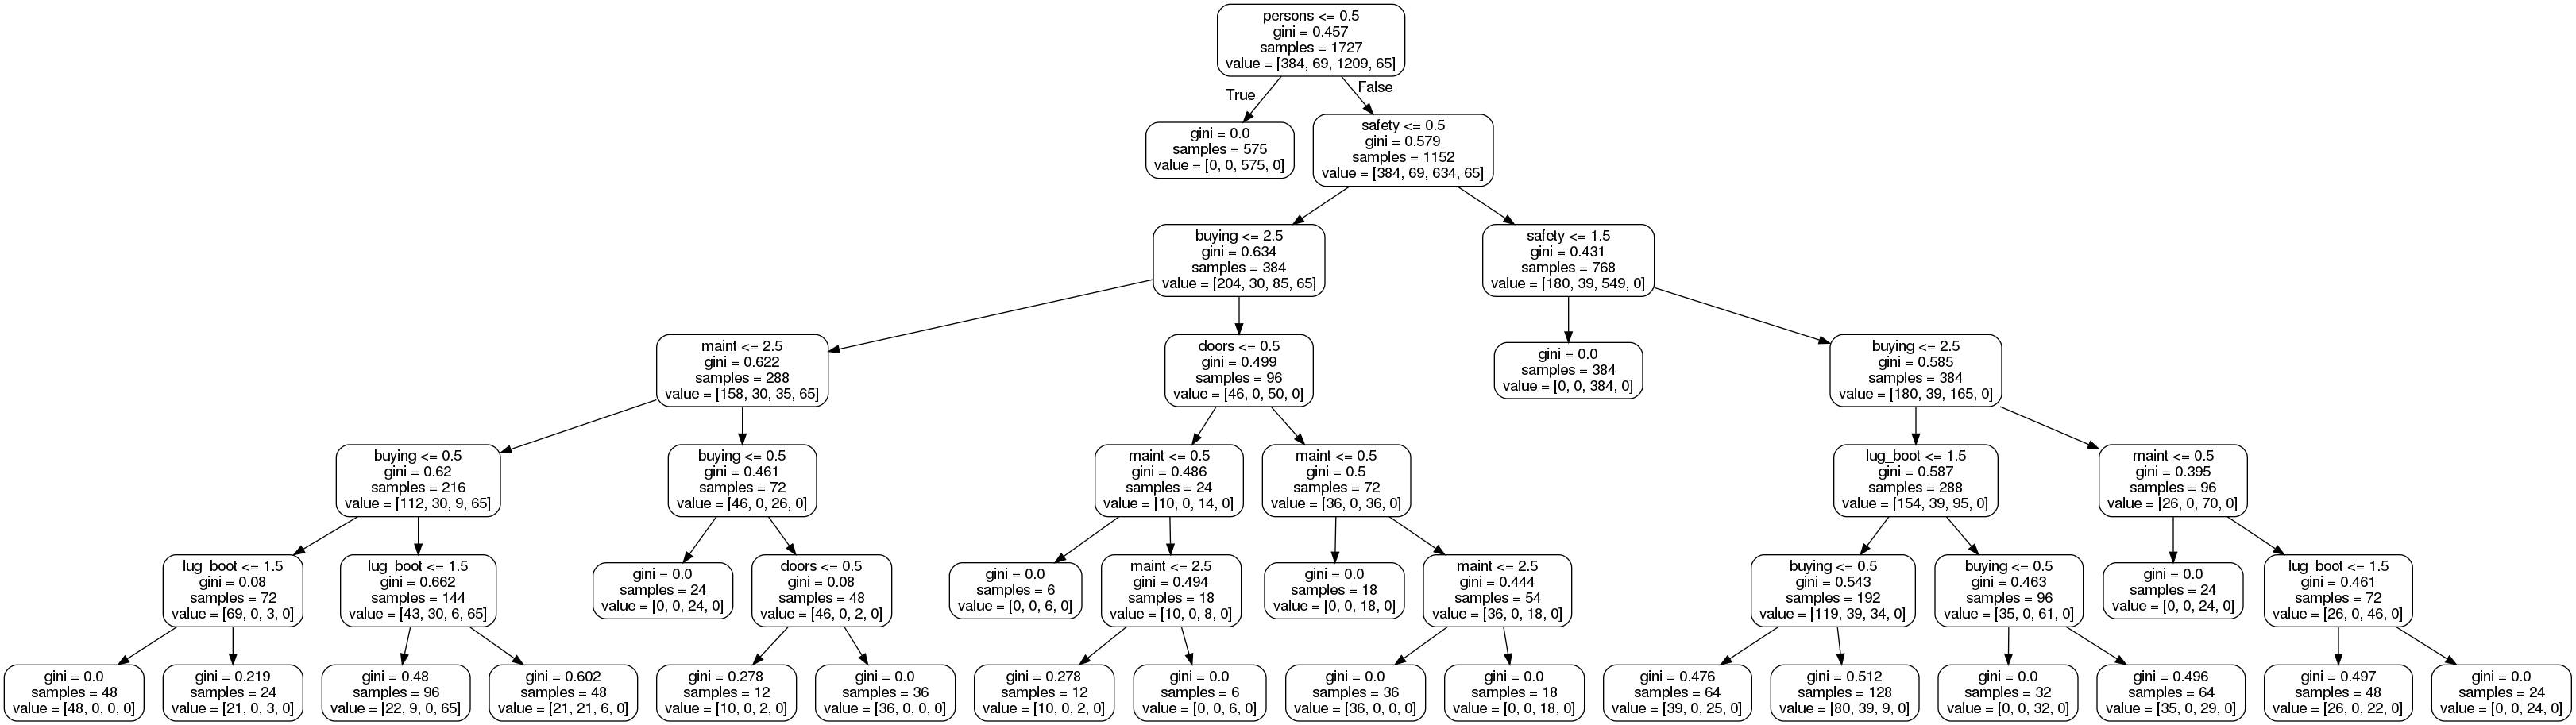

Maximum features:  6


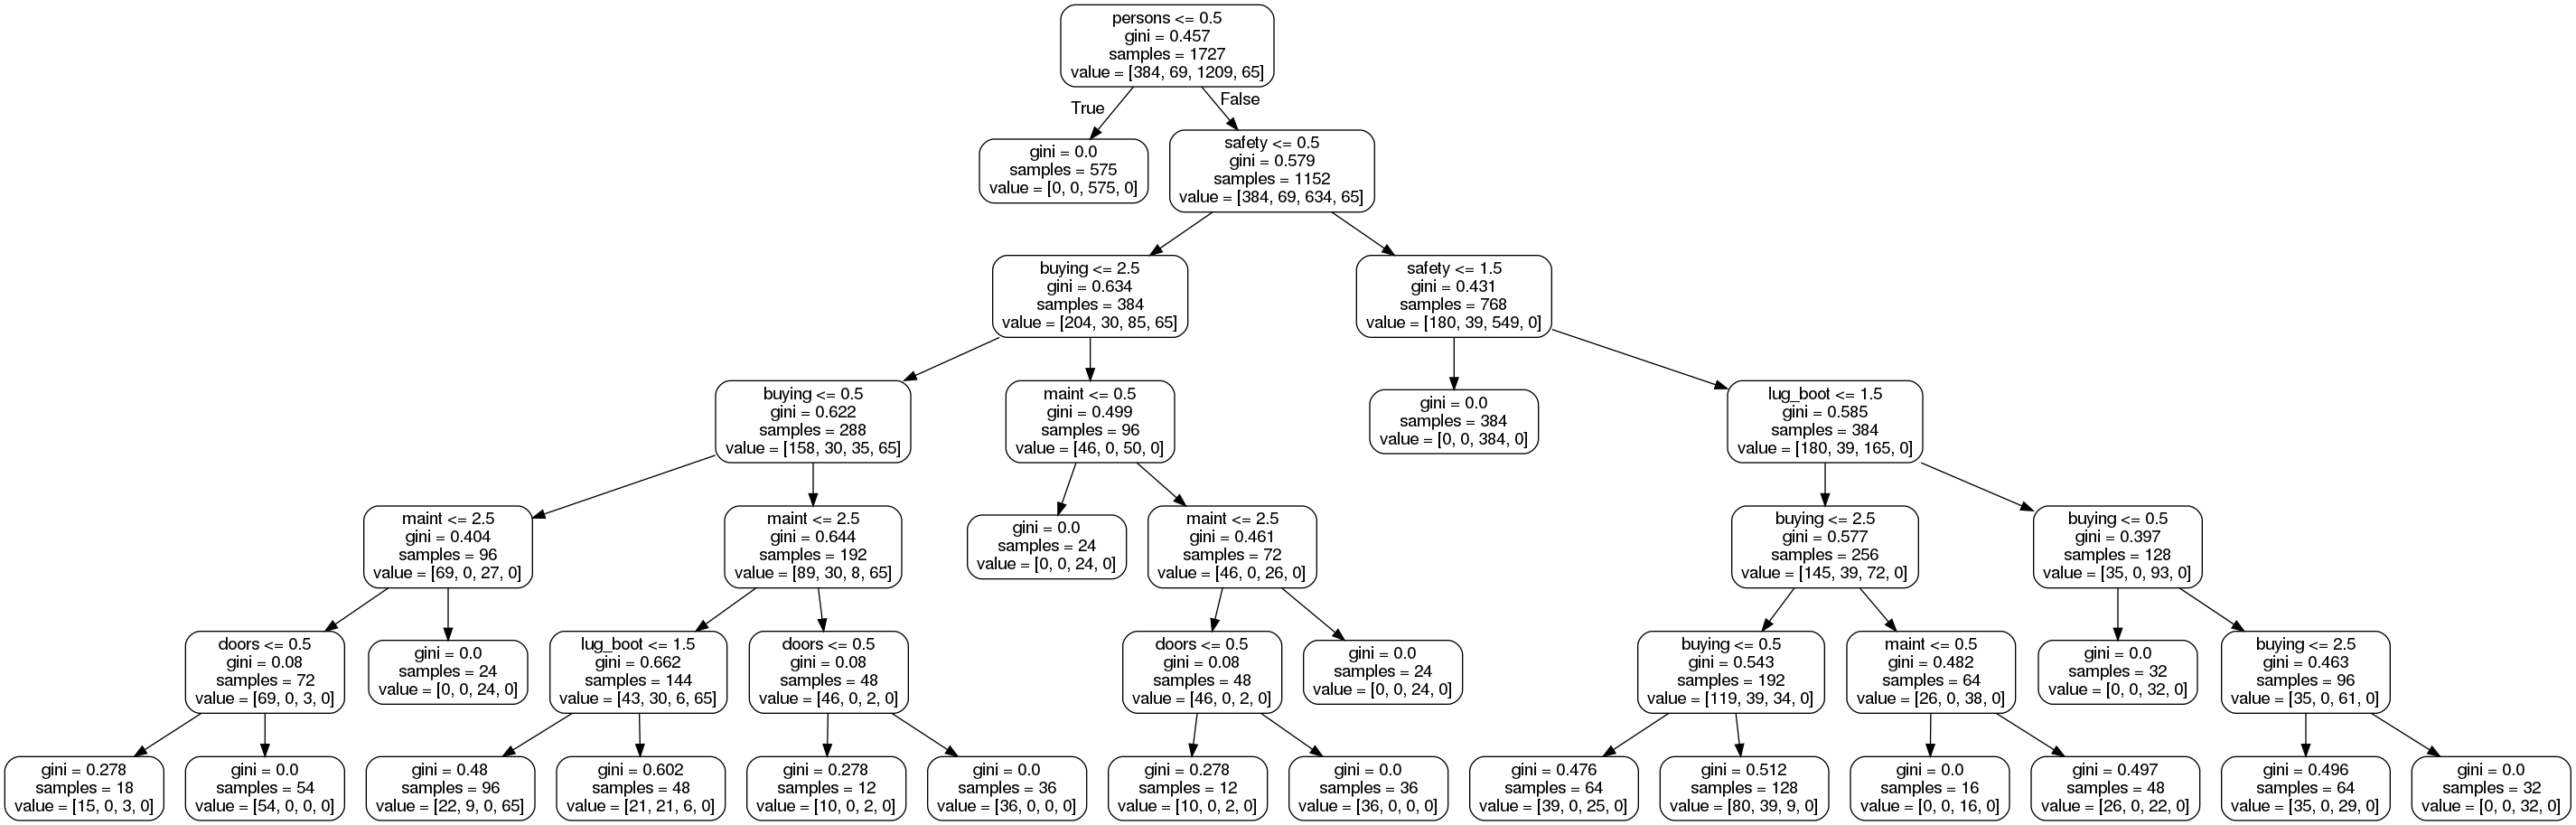

In [282]:
for features in [2, 4, 6]:
    print("Maximum features: ", features)
    clf = tree.DecisionTreeClassifier(max_features=features, max_depth=6)
    clf.fit(X, Y)
    draw_decision_tree(clf, df.columns[:-1])

Посмотрите, как меняется картинка для различных значений структурных параметров (варьируйте параметры max_depth, criterion, min_samples_leaf, max_features). Убедитесь, что увеличение глубины дерева и уменьшение количества объектов в листьях способствует гибкости модели и, как следствие, переобучению (что соответствует интуитивным соображениям о структуре дерева).

## Часть 3. Реализация алгоритма построения дерева решений

##### 50% баллов за задание, оценочное время выполнения 2-3 часа

In [238]:
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
from math import log2
from sklearn.base import BaseEstimator
from sklearn.datasets import make_classification, make_regression, load_digits, load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error

%matplotlib inline

Зафиксируем заранее `random_state` (a.k.a. random seed). Это должно повысить вероятность полной воспроизводимости результатов, впрочем, замечено, что тем не менее небольшие флуктуации возможны (например, качества прогнозов дерева, которое мы сейчас вырастим) в случае разных ОС.

In [239]:
RANDOM_STATE = 42

**Необходимо реализовать класс `DecisionTree`**

**Спецификация:**
- класс наследуется от `sklearn.BaseEstimator`;
- конструктор содержит следующие параметры: 
    `max_depth` - максимальная глубина дерева (по умолчанию - `numpy.inf`); 
    `min_samples_split` - минимальное число объектов в вершине, при котором происходит её разбиение (по умолчанию - 2); 
    `criterion` - критерий разбиения (для классификации - 'gini' или 'entropy', для регрессии - 'variance' или 'mad_median'; 
    по умолчанию - 'gini');
    
    Функционал, значение которого максимизируется для поиска оптимального разбиения в данной вершине имеет вид
    $$Q(X, j, t) = F(X) - \dfrac{|X_l|}{|X|} F(X_l) - \dfrac{|X_r|}{|X|} F(X_r),$$
    где $X$ - выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ - разбиение выборки $X$ на две части 
    по предикату $[x_j < t]$, а $F(X)$ -критерий разбиения.
    
    1. Для классификации: пусть $p_i$ - доля объектов $i$-го класса в выборке $X$.
    
        - 'gini': Неопределенность Джини $F(X) = 1 -\sum_{i = 1}^K p_i^2$.
    
        - 'entropy': Энтропия $F(X) = -\sum_{i = 1}^K p_i \log_2(p_i)$.
    
    2. Для регрессии: $y_j = y(x_j)$ - ответ на объекте $x_j$, $y = (y_1, \dots, y_{|X|})$ - вектор ответов.
    
        - 'variance': Дисперсия (среднее квадратичное отклонение от среднего) $F(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j - \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2$
    
        - 'mad_median': Среднее отклонение от медианы $F(X) = \dfrac{1}{|X|} \sum_{x_j \in X}|y_j - \mathrm{med}(y)|$
    
- класс имеет методы `fit`, `predict` и `predict_proba`;
- метод `fit` принимает матрицу объектов `X` и вектор ответов `y` (объекты `numpy.ndarray`) и возвращает экземпляр класса
    `DecisionTree`, представляющий собой решающее дерево, обученное по выборке `(X, y)` с учётом заданных в конструкторе параметров; 
- метод `predict_proba` принимает матрицу объектов `X` и возвращает матрицу `P` размера `X.shape[0] x K`, где `K` - число классов, такую что $p_{ij}$ есть вероятность принадлежности объекта, заданного $i$-ой строкой матрицы X к классу $j \in \{1, \dots, K\}$.
- метод `predict` принимает матрицу объектов и возвращает вектор предсказанных ответов; в случае классификации - это 
    наиболее многочисленный класс в листе, в который попал объект, а в случае регрессии - среднее значение ответов по 
    всем объектам этого листа;

**Советы по реализации:**

- Обучение дерева можно реализовать простым жадным рекурсивным алгоритмом: каждый раз выбирать наилучшее разбиение (номер признака и порог по нему).
- Если возможных порогов для разбиения будет слишком много, выбор наилучшего разбиения окажется вычислительно очень громоздкой задачей. Можно ограничить множество порогов любым удобным способом (например, посчитать квантили значений каждого признака или просто взяв случайный набор порогов).
- Лучше не подсматривать решение в готовых нагугленных вариантах. От вас требуется сделать всего лишь максимально простую реализацию того, как строится и применяется решающее дерево, а не применимую на практике универсальную библиотеку.

### Реализация (30% баллов)

In [240]:
def entropy(y):  
    entropy = 0
    c = Counter(y)
    for i in c.values():
        entropy -= i / len(y) * log2(i / len(y))
    return entropy

def gini(y):
    gini = 0
    c = Counter(y)
    for i in c.values():
        gini += (i / len(y)) ** 2
    return 1 - gini

def variance(y):
    return np.var(y)
    
def mad_median(y):
    return np.mean(np.absolute(y - np.median(y)))

In [241]:
class Tree():
    def __init__(self, index=None, value=None, left=None, right=None, y=None):
        self.index = index
        self.value = value
        self.left = left
        self.right = right
        self.y = y

In [242]:
class DecisionTree(BaseEstimator):
    def __init__(self, problem='classification', max_depth=np.inf, min_samples_split=2, 
                 criterion='gini', debug=False):
        self.problem = problem
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion
        self.debug = debug
    
    def fit(self, X, y):
        assert(self.problem in ['classification', 'regression'])
        assert(type(self.max_depth) == int and self.max_depth >= 0)
        assert(type(self.min_samples_split) == int and self.min_samples_split >= 2)
        assert(self.criterion in ['gini', 'entropy', 'variance', 'mad_median'])
        
        self.K = len(np.unique(y))
        
        self.tree = Tree()
        self._fit_recursion(self.tree, X, y, 0)
        
        return self
        
    def predict(self, X):
        try:
            getattr(self, "tree")
        except AttributeError:
            raise RuntimeError("Must train classificator before predicting!")
            
        y_predicted = np.zeros(X.shape[0])
        
        for i, x in enumerate(X):
            tree = self.tree
            while (tree.left is not None and tree.right is not None):
                if x[tree.index] < tree.value:
                    tree = tree.left
                else:
                    tree = tree.right
            if self.problem == 'classification':
                y_predicted[i] = Counter(tree.y).most_common()[0][0]
            else:
                y_predicted[i] = np.mean(tree.y)
            
        return y_predicted 
        
    def predict_proba(self, X):
        try:
            getattr(self, "tree")
        except AttributeError:
            raise RuntimeError("Must train classificator before predicting!")
            
        y_predicted = np.zeros((X.shape[0], self.K))
        
        for i, x in enumerate(X):
            tree = self.tree
            while (tree.left is not None and tree.right is not None):
                if x[tree.index] < tree.value:
                    tree = tree.left
                else:
                    tree = tree.right
            for c in Counter(tree.y).most_common():
                y_predicted[i][c[0]] = c[1] / len(tree.y)
                
        return y_predicted
    
    #разбиваем элементы в вершине по признаку
    def _get_split(self, X, index, value):
        left_indexes = []
        right_indexes = []
        for row in range(X.shape[0]):
            if X[row,index] < value:
                left_indexes.append(row)
            else:
                right_indexes.append(row)
        return left_indexes, right_indexes
    
    #считаем максимизируемый функционал
    def _get_functional(self, criterion, current, left, right):
        return criterion(current) - len(left) / len(current) * criterion(left) \
                                    - len(right) / len(current) * criterion(right)
    
    def _fit_recursion(self, tree, X, y, depth):
        if depth >= self.max_depth or len(y) < self.min_samples_split:
            tree.y = y
            return
        
        best_index = 0
        best_value = 0
        best_score = -1
        criterions = {'gini': gini, 'entropy': entropy, 'variance': variance, 'mad_median': mad_median}
        
        number_features = X.shape[1]
        for index in range(number_features):
            values = np.unique(X[:,index])
            for value in values:
                left_indexes, right_indexes = self._get_split(X, index, value)
                
                if left_indexes and right_indexes:
                    score = self._get_functional(criterions[self.criterion], y, y[left_indexes], y[right_indexes])
                else:
                    continue
                
                if score > best_score:
                    best_index = index
                    best_value = value
                    best_score = score
                    
        tree.index = best_index
        tree.value = best_value
        left_indexes, right_indexes = self._get_split(X, best_index, best_value)
        
        if best_score == -1 or not left_indexes or not right_indexes:
            tree.y = y
            return
        
        tree.left = Tree()
        tree.right = Tree()
        
        self._fit_recursion(tree.left, X[left_indexes], y[left_indexes], depth + 1)
        self._fit_recursion(tree.right, X[right_indexes], y[right_indexes], depth + 1)

## Тестирование реализованного алгоритма

### Классификация (10% баллов)

С помощью метода `load_digits` загрузите датасет `digits`. Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить неглубокие решающие деревья и убедитесь, что критерии gini и entropy дают разные результаты.

In [243]:
digits = load_digits()
X_train, X_test, Y_train, Y_test = train_test_split(digits['data'], digits['target'], test_size=0.2, 
                                                    random_state=RANDOM_STATE)

clf = DecisionTree(criterion='entropy', max_depth = 6)
clf.fit(X_train, Y_train)
print("Entropy:")
print("На тренировочных данных: ", accuracy_score(Y_train, clf.predict(X_train)))
print("На тестовых данных: ",  accuracy_score(Y_test, clf.predict(X_test)))

print('\n')

clf = DecisionTree(criterion='gini', max_depth = 6)
clf.fit(X_train, Y_train)
print("Gini:")
print("На тренировочных данных: ", accuracy_score(Y_train, clf.predict(X_train)))
print("На тестовых данных: ", accuracy_score(Y_test, clf.predict(X_test)))

Entropy:
На тренировочных данных:  0.911621433542
На тестовых данных:  0.85


Gini:
На тренировочных данных:  0.794015309673
На тестовых данных:  0.786111111111


С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `max_depth` и `criterion`. Для параметра `max_depth` используйте диапазон значений - range(3, 11), а для criterion - {'gini', 'entropy'}. Критерий качества `scoring`='accuracy'.

In [244]:
%%time
gs = GridSearchCV(DecisionTree(), param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(3, 11)},
                 cv=5, scoring="accuracy", return_train_score=True)
gs.fit(X_train, Y_train)

CPU times: user 6min 12s, sys: 176 ms, total: 6min 12s
Wall time: 6min 12s


In [245]:
print(gs.best_params_)
print(gs.best_score_)

{'criterion': 'entropy', 'max_depth': 10}
0.852470424495


Постройте графики средних значений критерия качества `accuracy` для критериев `gini` и `entropy` в зависимости от `max_depth`.

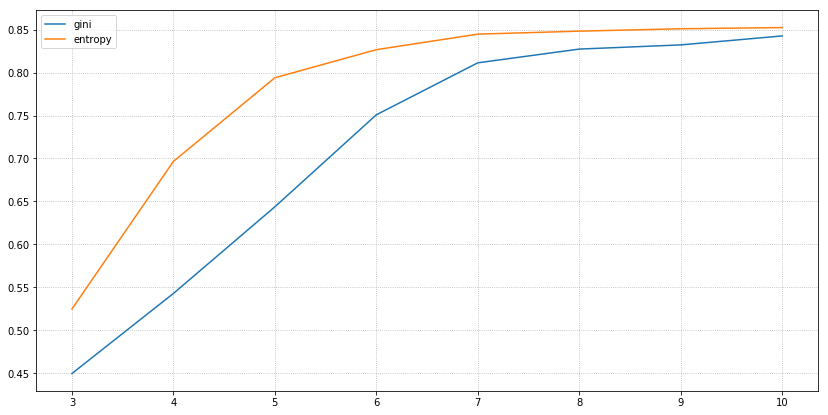

In [246]:
means = gs.cv_results_["mean_test_score"]

plt.figure(figsize=(14,7))
plt.plot(range(3,11), means[:8], label='gini')
plt.plot(range(3,11), means[8:], label='entropy')
plt.grid(ls=':')
plt.legend()
plt.show()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров max_depth и criterion?

Лучшими параметрами (из предложенных - ухудшения еще не видно, возможно могло быть и лучше) являются $\{'entropy', 10\}$. При малой глубине дерева неопределенность Джини сильно уступает энтропии. 

Используя найденные оптимальные значения max_depth и criterion, обучите решающее дерево на X_train, y_train и вычислите вероятности принадлежности к классам для X_test.

In [247]:
clf = DecisionTree(criterion='entropy', max_depth = 10)
clf.fit(X_train, Y_train)

np.set_printoptions(threshold=np.nan)
y_proba = clf.predict_proba(X_test)
print(y_proba)

[[ 0.    0.    0.    0.    0.    0.    1.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    1.  ]
 [ 0.    0.    0.    1.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    1.    0.    0.  ]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    1.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    1.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    1.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    1.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    1.    0.    0.  ]
 [ 0.    1.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    1.  ]
 [ 0.    0.    0.    0.    0.    0.    1.    0.    0.    0.  ]
 [ 1.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    1.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    1.    0.    0.    0.  

Для полученной матрицы вычислите усредненные по всем объектам из `X_test` значения вероятностей принадлежности к классам.

In [248]:
classes_proba = np.mean(y_proba, axis=0)
print(classes_proba)

[ 0.08611111  0.09166667  0.08055556  0.09166667  0.11944444  0.13888889
  0.10347222  0.1         0.08263889  0.10555556]


Чему примерно равна максимальная вероятность в полученном векторе?

In [249]:
print(np.max(classes_proba))

0.138888888889


In [250]:
#реальное распределение по классам в тестовой выборке

classes_proba_real = np.zeros(10)
for c in Counter(Y_test).most_common():
    classes_proba_real[c[0]] = c[1] / len(Y_test)
print(classes_proba_real)

[ 0.09166667  0.07777778  0.09166667  0.09444444  0.12777778  0.13055556
  0.09722222  0.09444444  0.08333333  0.11111111]


### Регрессия (10% баллов)

С помощью метода `load_boston` загрузите датасет `boston`. Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить неглубокие регрессионные деревья и убедитесь, что критерии `variance` и `mad_median` дают разные результаты.

In [252]:
boston = load_boston()
X_train, X_test, Y_train, Y_test = train_test_split(boston['data'], boston['target'], test_size=0.2, 
                                                    random_state=RANDOM_STATE)

clf = DecisionTree(problem='regression', criterion='variance', max_depth = 6)
clf.fit(X_train, Y_train)
print("Variance:")
print("На тренировочной выборке: ", mean_squared_error(Y_train, clf.predict(X_train)))
print("На тестовой выборке: ", mean_squared_error(Y_test, clf.predict(X_test)))

print('\n')

clf = DecisionTree(problem='regression', criterion='mad_median', max_depth = 6)
clf.fit(X_train, Y_train)
print("Mad Median:")
print("На тренировочной выборке: ", mean_squared_error(Y_train, clf.predict(X_train)))
print("На тестовой выборке: ", mean_squared_error(Y_test, clf.predict(X_test)))

Variance:
На тренировочной выборке:  5.0686051716
На тестовой выборке:  9.51204728647


Mad Median:
На тренировочной выборке:  5.27526495641
На тестовой выборке:  15.6182488609


С помощью 5-кратной кросс-валидации подберите оптимальное значение параметров `max_depth` и `criterion`. Для параметра `max_depth` используйте диапазон значений - `range(2, 9)`, а для `criterion` - {'variance', 'mad_median'}. Критерий качества `scoring`='neg_mean_squared_error'.

In [254]:
%%time
gs = GridSearchCV(DecisionTree(), param_grid={'criterion': ['variance', 'mad_median'], 'max_depth': range(2, 9)},
                 cv=5, scoring="neg_mean_squared_error", return_train_score=True)
gs.fit(X_train, Y_train)

CPU times: user 2min 19s, sys: 48 ms, total: 2min 19s
Wall time: 2min 19s


In [255]:
print(gs.best_params_)
print(gs.best_score_)

{'criterion': 'mad_median', 'max_depth': 8}
-29.1947772277


Постройте графики средних значений критерия качества `neg_mean_squared_error` для критериев `variance` и `mad_median` в зависимости от `max_depth`.

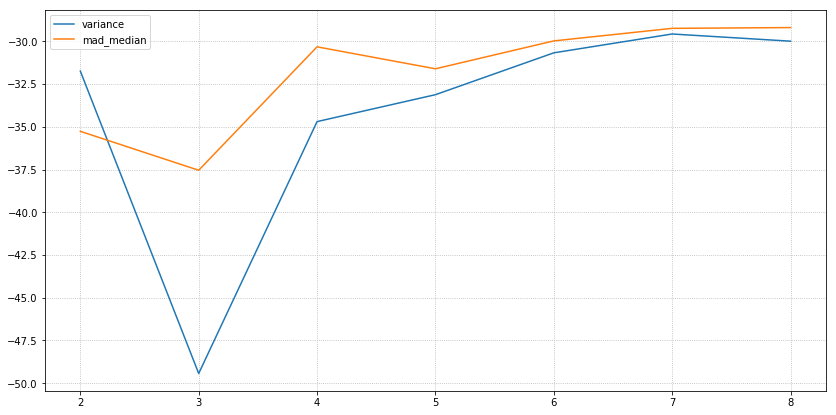

In [261]:
means = gs.cv_results_["mean_test_score"]

plt.figure(figsize=(14,7))
plt.plot(range(2,9), means[:7], label='variance')
plt.plot(range(2,9), means[7:], label='mad_median')
plt.grid(ls=':')
plt.legend()
plt.show()